In [2]:
import os 
os.chdir('C:/Users/viswanath_thatha/Downloads')

In [3]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import numpy as np

In [5]:
wc = pd.read_excel('Cleaned player data.xlsx')

,Player Name,Country,Captain,Role,Career_Batting_Matches,Career_Batting_Innings,Career_Batting_NotOuts,Career_Batting_Runs,Career_Batting_HighScore,Career_Batting_Average,...,WC_Bat_BF,WC_Bat_SR,WC_Bat_100,WC_Bat_50,WC_Bowl_Inns,WC_Bowl_Wkts,WC_Bowl_Ave,WC_Bowl_Econ,WC_Bowl_SR,WC_Field_DismissalsPerInns
0,Aftab Alam,Afghanistan,0,All0rounder,22,13,8,61,16*,12.20,...,12,116.66,0,0,1,2,27.50,6.11,27.0,0.000
1,Asghar Afghan,Afghanistan,0,Batsman,100,94,9,2035,101,23.94,...,95,75.78,0,1,1,0,0.00,7.20,0.0,0.000
2,Dawlat Zadran,Afghanistan,0,Bowler,75,50,26,502,47*,20.91,...,39,35.89,0,0,5,6,41.33,6.04,41.0,0.000
3,Gulbadin Naib,Afghanistan,1,All0rounder,53,44,8,807,82*,22.41,...,1,0.00,0,0,1,1,53.00,5.88,54.0,1.000
4,Hamid Hassan,Afghanistan,0,Bowler,33,17,4,92,17,7.07,...,86,44.18,0,0,6,8,32.62,5.11,38.2,0.166
5,Hashmatullah Shahidi,Afghanistan,0,Batsman,29,29,6,806,97*,35.04,...,0,0.00,0,0,0,0,0.00,0.00,0.0,0.000
6,Hazratullah Zazai,Afghanistan,0,Batsman,7,7,0,169,67,24.14,...,0,0.00,0,0,0,0,0.00,0.00,0.0,0.000
7,Mohammad Nabi,Afghanistan,0,All0rounder,111,99,11,2565,116,29.14,...,115,78.26,0,0,6,3,87.00,5.71,91.3,0.500
8,Mohammad Shahzad,Afghanistan,0,Wicket0keeper0batsman,80,80,3,2617,131*,33.98,...,0,0.00,0,0,0,0,0.00,0.00,0.0,0.000
9,Mujeeb Ur Rahman,Afghanistan,0,Bowler,28,12,6,41,15,6.83,...,0,0.00,0,0,0,0,0.00,0.00,0.0,0.000


In [7]:
wc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 82 columns):
Player Name                          150 non-null object
Country                              150 non-null object
Captain                              150 non-null int64
Role                                 150 non-null object
Career_Batting_Matches               150 non-null int64
Career_Batting_Innings               150 non-null int64
Career_Batting_NotOuts               150 non-null int64
Career_Batting_Runs                  150 non-null int64
Career_Batting_HighScore             150 non-null object
Career_Batting_Average               150 non-null float64
Career_Batting_BallsFaced            150 non-null int64
Career_Batting_StrikeRate            150 non-null float64
Career_Batting_100s                  150 non-null int64
Career_Batting_50s                   150 non-null int64
Career_Bowling_Innings               150 non-null int64
Career_Bowling_Wickets               150 non-nu

In [57]:
a = wc[wc.columns[np.r_[0:2,19:28]]]
a.head(1)
#a.shape

,Player Name,Country,Recent_Matches,Recent_Batting_Innings,Recent_Batting_NotOut,Recent_Batting_Runs,Recent_Batting_HighScore,Recent_Batting_BallsFaced,Recent_Batting_StrikeRate,Recent_Batting_100s,Recent_Batting_50s
0,Aftab Alam,Afghanistan,13,7,5,37,16,61,60.65,0,0


In [45]:
#a = a.replace('\*','',regex=True)
#a.head(1)

In [79]:
from sklearn.preprocessing import StandardScaler,minmax_scale
scaler = minmax_scale(a[a.columns[2:]])

C:\Users\viswanath_thatha\Documents\anaconda\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64.
  


In [80]:
scaler

array([[0.16049383, 0.09459459, 0.27777778, ..., 0.34657143, 0.        ,
        0.        ],
       [0.7037037 , 0.7027027 , 0.22222222, ..., 0.39914286, 0.05263158,
        0.27272727],
       [0.56790123, 0.37837838, 1.        , ..., 0.5204    , 0.        ,
        0.        ],
       ...,
       [0.30864198, 0.32432432, 0.11111111, ..., 0.63028571, 0.21052632,
        0.09090909],
       [0.14814815, 0.06756757, 0.16666667, ..., 0.50548571, 0.        ,
        0.        ],
       [0.25925926, 0.18918919, 0.44444444, ..., 0.2264    , 0.        ,
        0.        ]])

In [85]:
a.head(1)
b = a.copy()

In [93]:
b = b.drop(['Recent_Batting_BallsFaced','Recent_Batting_100s','Recent_Batting_50s'],axis=1)
b.head(1)

,Player Name,Country,Recent_Matches,Recent_Batting_NotOut,Recent_Batting_Runs,Recent_Batting_HighScore,Recent_Batting_StrikeRate
0,Aftab Alam,Afghanistan,13,5,37,16,60.65


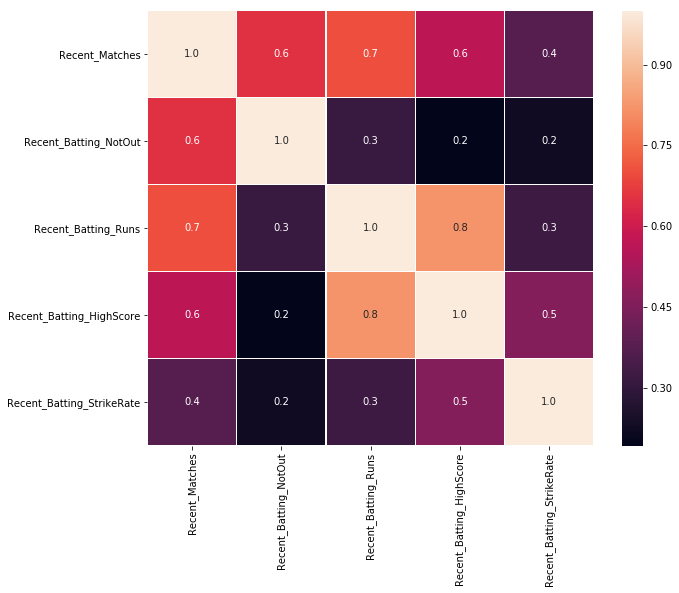

In [94]:
import seaborn as sns
f,ax = plt.subplots(figsize=(10, 8))
sns.heatmap(b.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

In [108]:
scaler = minmax_scale(a[a.columns[2:]])

C:\Users\viswanath_thatha\Documents\anaconda\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64.
  """Entry point for launching an IPython kernel.


In [115]:
wc21 = pd.DataFrame(scaler)
wc21 
wc22 = a[a.columns[0:2]]
wc22
wc23 = pd.concat([wc12,wc11],axis=1)
wc23.to_csv('dummy1.csv')

In [172]:
wcmean = wc23.mean(axis=1)
all = pd.concat([wc22,wc['Role'],wcmean],axis=1)
all.head()
in23 = all[all['Country'] == 'England']
in23

,Player Name,Country,Role,0
45,AU Rashid,England,All0rounder,0.336250
46,BA Stokes,England,All0rounder,0.509451
47,CR Woakes,England,All0rounder,0.349634
48,LA Dawson,England,All0rounder,0.065341
49,EJG Morgan,England,Batsman,0.696441
50,JC Buttler,England,Wicket0keeper0batsman,0.644214
51,JE Root,England,Batsman,0.771024
52,JJ Roy,England,Batsman,0.636844
53,JC Archer,England,All0rounder,0.004115
54,JM Bairstow,England,Wicket0keeper0batsman,0.528743


In [174]:
in23[in23['Role'].str.contains('All0rounder')].sort_values(by=0,ascending=False)

,Player Name,Country,Role,0
46,BA Stokes,England,All0rounder,0.509451
57,MM Ali,England,All0rounder,0.435340
47,CR Woakes,England,All0rounder,0.349634
45,AU Rashid,England,All0rounder,0.336250
55,LE Plunkett,England,All0rounder,0.251370
58,TK Curran,England,All0rounder,0.163336
48,LA Dawson,England,All0rounder,0.065341
53,JC Archer,England,All0rounder,0.004115
